# kernel principal component analysis for nonlinear mappings

Many machine learning algorithms make assumptions about the linear separability of the input data. However, if we are dealing with nonlinear problems, which we may encounter rather frequently in real-world applications, linear transformation techniques for dimensionality reduction, such as PCA and LDA, may not be the best choice. we will take a look at a kernelized version of PCA, or KPCA, which relates to the concepts of kernel SVM .  Using kernel PCA, we will learn how to transform data that is not linearly separable onto a new, lower-dimensional subspace that is suitable for linear classifiers.

<img src="images/linear_and_nonlinear_problems.jpeg" alt="PCA orthogonal axes" title="PCA orthogonal axes" height="300" width="450">



## Kernel functions and the kernel trick

As we remember from our discussion about kernel SVMs, we can tackle nonlinear problems by projecting them onto a new feature space of higher dimensionality where the classes become linearly separable. To transform the samples $x \in \mathbb{R}^d$ onto this higher k-dimensional subspace, we defined a nonlinear mapping function $\phi$ :

\begin{equation*}
\phi : \mathbb{R}^d \rightarrow \mathbb{R}^k \left( k >> d \right)
\end{equation*}

We can think of $\phi$ as a function that creates nonlinear combinations of the original features to map the original $d$-dimensional dataset onto a larger, $k$-dimensional feature space. For example, if we had a feature vector $x \in \mathbb{R}^d$ ($x$ is a column vector consisting of $d$ features) with two dimensions $\left( d = 2 \right)$ , a potential mapping onto a 3D-space could be:

\begin{equation*}
\begin{matrix}
x = \left[ x_1, x_2 \right]^T \\
\downarrow \phi \\
z = \left[ x_1^2, \sqrt{2 x_1x_2}, x_2^2 \right]^T
\end{matrix}
\end{equation*}

In other words, we perform a nonlinear mapping via kernel PCA that transforms the data onto a higher-dimensional space. We then use standard PCA in this higher-dimensional space to project the data back onto a lower-dimensional space where the samples can be separated by a linear classifier (under the condition that the samples can be separated by density in the input space). However, one downside of this approach is that it is computationally very expensive, and this is where we use the **kernel trick**. Using the kernel trick, we can compute the similarity between two high-dimension feature vectors in the original feature space.

Before we proceed let us think back to the standard PCA approach. We computed the covariance between two features k and j as follows:

\begin{equation*}
\sigma_{jk} = \frac{1}{n} \sum_{i=1}^n \left( x_j^{(i)} - \mu_j \right) \left( x_k^{(i)} - \mu_k \right)
\end{equation*}

Since the standardizing of features centers them at mean zero, for instance, $\mu_j = 0$ and $\mu_k = 0$ , we can simplify this equation as follows:

\begin{equation*}
\sigma_{jk} = \frac{1}{n} \sum_{i=1}^n x_j^{(i)} x_k^{(i)}
\end{equation*}

Note that the preceding equation refers to the covariance between two features; now, let us write the general equation to calculate the covariance matrix $\Sigma$:

\begin{equation*}
\Sigma = \frac{1}{n} \sum_{i=1}^n x^{(i)} x^{(i)^T}
\end{equation*}

Bernhard Scholkopf generalized this approach so that we can replace the dot products between samples in the original feature space with the nonlinear feature combinations via $\phi$:

\begin{equation*}
\Sigma = \frac{1}{n} \sum_{i=1}^n \phi \left( x^{(i)} \right) \phi \left( x^{(i)} \right)^T
\end{equation*}

To obtain the eigenvectors—the principal components—from this covariance matrix, we have to solve the following equation:

\begin{equation*}
\begin{matrix}
\Sigma{}v = \lambda{}v \\
\Rightarrow \frac{1}{n} \sum_{i=1}^n \phi \left( x^{(i)} \right) \phi \left( x^{(i)} \right)^T v = \lambda{}v \\
\Rightarrow v = \frac{1}{n \lambda} \sum_{i=1}^n \phi \left( x^{(i)} \right) \phi \left( x^{(i)} \right)^T v = \frac{1}{n} \sum_{i=1}^n a^{(i)} \phi \left( x^{(i)} \right)
\end{matrix}
\end{equation*}

Here, $\lambda$ and $v$ are the eigenvalues and eigenvectors of the covariance matrix $\Sigma$ , and a can be obtained by extracting the eigenvectors of the kernel (similarity) matrix $K$.

We use the kernel trick to avoid calculating the pairwise dot products of the samples $x$ under $\phi$ explicitly by using a kernel function $\kappa$ so that we don't need to calculate the eigenvectors explicitly:

\begin{equation*}
\kappa \left( x^{(i)}, x^{(i)} \right) = \phi \left( x^{(i)} \right)^T \phi \left( x^{(i)} \right)
\end{equation*}

In other words, what we obtain after kernel PCA are the samples already projected onto the respective components, rather than constructing a transformation matrix as in the standard PCA approach. Basically, the kernel function (or simply **kernel**) can be understood as a function that calculates a dot product between two vectors—a measure of similarity.

The most commonly used kernels are as follows:

* The Polynomial kernel
\begin{equation*}
\kappa \left( x^{(i)}, x^{(j)} \right) = \left( x^{(i)T} x^{(j)} + \theta \right)^p
\end{equation*}

Here, $\theta$ is the threshold and $p$ is the power that has to be specified by the user.

* The hyperbolic tangent (sigmoid) kernel:
\begin{equation*}
\kappa \left( x^{(i)}, x^{(j)} \right) = \tanh{\left( \eta{}x^{(i)T} x^{(i)} + \theta \right)}
\end{equation*}

* The **Radial Basis Function (RBF)** or Gaussian kernel, which we will use in the following examples in the next subsection:

\begin{equation*}
\kappa \left( x^{(i)}, x^{(j)} \right) = \exp{\left( - \frac{\| x^{(i)} - x^{(j)} \|^2}{2 \sigma^2} \right)}
\end{equation*}

It is often written in the following form, introducing the variable $\gamma = \frac{1}{2\sigma}$

\begin{equation*}
\kappa \left( x^{(i)}, x^{(j)} \right) = \exp{\left( - \gamma \| x^{(i)} - x^{(j)} \|^2 \right)}
\end{equation*}

To summarize what we have learned so far, we can define the following three steps to implement an RBF kernel PCA:

1. We compute the kernel (similarity) matrix $K$, where we need to calculate the following:

\begin{equation*}
\kappa \left( x^{(i)}, x^{(j)} \right) = \exp{\left( - \gamma \| x^{(i)} - x^{(j)} \|^2 \right)}
\end{equation*}

We do this for each pair of samples:

\begin{equation*}
K = 
\begin{bmatrix}
\kappa \left( x^{(1)}, x^{(1)} \right) & \kappa \left( x^{(1)}, x^{(2)} \right) & \dots & \kappa \left( x^{(1)}, x^{(n)} \right) \\
\kappa \left( x^{(2)}, x^{(1)} \right) & \kappa \left( x^{(2)}, x^{(2)} \right) & \dots & \kappa \left( x^{(2)}, x^{(n)} \right) \\
\vdots & \vdots & \ddots & \vdots \\
\kappa \left( x^{(n)}, x^{(1)} \right) & \kappa \left( x^{(n)}, x^{(2)} \right) & \dots & \kappa \left( x^{(n)}, x^{(n)} \right)
\end{bmatrix}
\end{equation*}

For example, if our dataset contains 100 training samples, the symmetric kernel matrix of the pairwise similarities would be $100 \times 100$-dimensional.

2. We center the kernel matrix $K$ using the following equation:

\begin{equation*}
K \prime = K - 1_n K - K1_n + 1_n K 1_n
\end{equation*}

Here, $1_n$ is an $n \times n$-dimensional matrix (the same dimensions as the kernel matrix) where all values are equal to $\frac{1}{n}$

3. We collect the top $k$ eigenvectors of the centered kernel matrix based on their corresponding eigenvalues, which are ranked by decreasing magnitude. In contrast to standard PCA, the eigenvectors are not the principal component axes, but the samples already projected onto these axes.

The centering of the kernel matrix in the second step becomes necessary, since we do not compute the new feature space explicitly so that we cannot guarantee that the new feature space is also centered at zero.

## Implementing a Kernel PCA in python

Using some SciPy and NumPy helper functions, we will see that implementing a kernel PCA is actually really simple:

In [3]:
# %load rbf_pca.py
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementarion.
    
    :param numpy.ndarray X: Data as an numpy.ndarray of shape [n_samples, n_features]
    :param float gamma: Tuning parameter of the RBF kernel
    :param int n_components: Number of principal compements to return
    
    :rtype: numpy.ndarray [n_samples, k_features], list
    :returns: Projected dataset, Eigenvalues
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dist = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix
    mat_sq_dist = squareform(sq_dist)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dist)
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtain eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns the in ascending order
    eigvals, eigvecs = eigh(K)
    print(eigvals)
    print("-"*20)
    print(eigvecs)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    print(eigvals)
    print("-"*20)
    print(eigvecs)
    
    #Collect the top k eigenvectors (prohejected samples)
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    return X_pc


One downside of using an RBF kernel PCA for dimensionality reduction is that we have to specify the $\gamma$ parameter a priori. Finding an appropriate value for $\gamma$ requires experimentation and is best done using algorithms for parameter tuning

### Example 1

Now, let us apply our rbf_kernel_pca on some nonlinear example dataset that we have created.

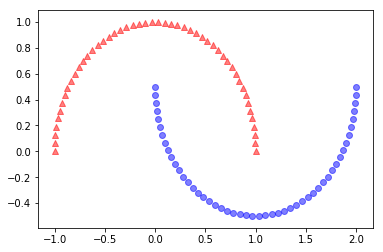

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

Our goal is to unfold the half-moons via kernel PCA so that the dataset can serve as a suitable input for a linear classifier. 

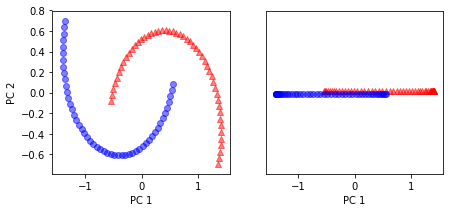

In [5]:
from sklearn.decomposition import PCA
import numpy as np

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')

ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

Clearly, we can see in the resulting figure that a linear classifier would be unable to perform well on the dataset transformed via standard PCA.

Now, let us try out our kernel PCA function `rbf_kernel_pca`, which we implemented in the previous subsection:

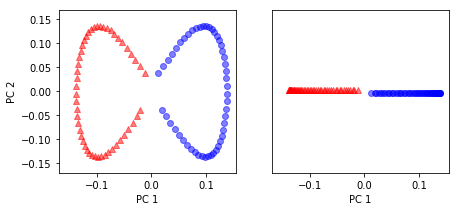

In [7]:
from rbf_pca import rbf_kernel_pca

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02, color='blue', marker='o', alpha='0.5')

ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')

ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

We can now see that the two classes (`circles` and `triangles`) are linearly well separated so that it becomes a suitable training dataset for linear classifiers.

Unfortunately, there is no universal value for the tuning parameter $\gamma$ that works well for different datasets. Finding a value that is appropriate for a given problem requires experimentation.

## Example 2

Let us take a look at an interesting example of a nonlinear problem, concentric circles:

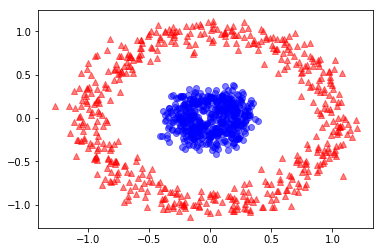

In [15]:
from sklearn.datasets import make_circles


X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha='0.5')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)

plt.show()

Let's start with the standard PCA approach to compare it to the results of the RBF kernel PCA:

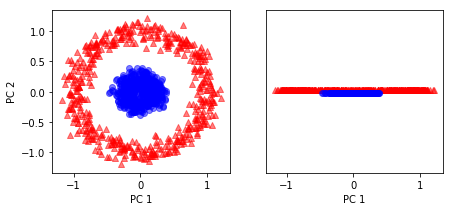

In [16]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((500, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500, 1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

Given an appropriate value for $\gamma$, let us see if we are luckier using the RBF kernel PCA implementation:

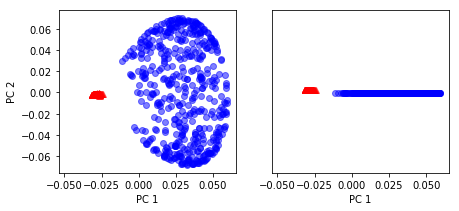

In [17]:
X_kpca, _ = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

## Projecting new data points

In this section, you will learn how to project data points that were not part of the training dataset.

As we remember from the standard PCA approach we project data by calculating the dot product between a transformation matrix and the input samples; the columns of the projection matrix are the top $k$ eigenvectors ($v$) that we obtained from the covariance matrix.

Now, the question is how we can transfer this concept to kernel PCA. If we think back to the idea behind kernel PCA, we remember that we obtained an eigenvector ($a$) of the centered kernel matrix (not the covariance matrix), which means that those are the samples that are already projected onto the principal component axis $v$. Thus, if we want to project a new sample $z^{\prime}} onto this principal component axis, we'd need to compute the following:

\begin{equation*}
\phi \left( x^{\prime} \right)^T v
\end{equation*}

Fortunately, we can use the kernel trick so that we don't have to calculate the projection $\phi \left( x^{\prime} \right)^T v$ explicitly. However, it is worth noting that kernel PCA, in contrast to standard PCA, is a memory-based method, which means that we have to re-use the original training set each time to project new samples. We have to calculate the pairwise RBF kernel (similarity) between each ith sample in the training dataset and the new sample $x^{\prime}$ :

\begin{equation*}
\begin{matrix}
\phi \left(x^{\prime} \right)^T v = \sum_i a^{(i)} \phi \left( x^{\prime} \right)^T \phi \left( x^{(i)} \right) \\
= \sum_i a^{(i)} \kappa \left( x^{\prime}, x^{(i)} \right)
\end{matrix}
\end{equation*}

Here, the eigenvectors a and eigenvalues $\gamma$ of the kernel matrix $K$ satisfy the following condition in the equation:

\begin{equation*}
Ka = \lambda{}a
\end{equation*}

After calculating the similarity between the new samples and the samples in the training set, we have to normalize the eigenvector a by its eigenvalue. Thus, let us modify the `rbf_kernel_pca function` that we implemented earlier so that it also returns the eigenvalues of the kernel matrix:

In [19]:
# %load rbf_pca2.py
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementarion.
    
    :param numpy.ndarray X: Data as an numpy.ndarray of shape [n_samples, n_features]
    :param float gamma: Tuning parameter of the RBF kernel
    :param int n_components: Number of principal compements to return
    
    :rtype: numpy.ndarray [n_samples, k_features], list
    :returns: Projected dataset, Eigenvalues
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dist = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix
    mat_sq_dist = squareform(sq_dist)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dist)
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtain eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns the in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]
    
    return alphas, lambdas

In [23]:
# create a new half-moon dataset and project it
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [24]:
# we assume that the 26th point is a new data point x'. to make sure our implementation
x_new = X[25]
print(x_new)

[1.8713187  0.00928245]


In [25]:
x_proj = alphas[25]  # original projection
x_proj

array([0.07877284])

In [27]:
# with this function, we will be able to project any new data sample as well.
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [28]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.07877284])

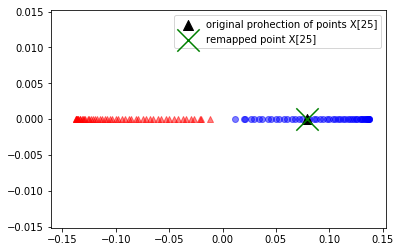

In [29]:
# let's see the projection
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)

plt.scatter(x_proj, 0, color='black', label='original prohection of points X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)

plt.legend(scatterpoints=1)
plt.show()

### kernel principal component analysis in scikit-learn

For our convenience, scikit-learn implements a kernel PCA class in the `sklearn.decomposition` submodule. The usage is similar to the standard PCA class, and we can specify the `kernel` via the kernel parameter:

In [30]:
from sklearn.decomposition import KernelPCA


X, y = make_moons(n_samples=100, random_state=123)

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

Let's plot the transformed half-moon shape data onto the first two principal components:

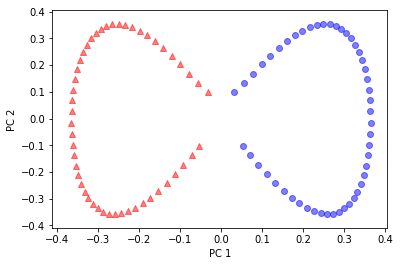

In [31]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()